In [1]:
from griffis_soccer_analysis.fbref_code import *
import pandas as pd
from scipy import stats
import math
from math import pi
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections import register_projection
from matplotlib.projections.polar import PolarAxes
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

In [2]:
df = pd.read_csv('../Final FBRef Next 12 Leagues.csv')
df.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,pAdjAerialWinsPer90,pAdjAerialLossPer90,pAdjDrbPastAttPer90,TouchCentrality,Tkl+IntPer600OppTouch,pAdjTouchesPer90,CarriesPer50Touches,ProgCarriesPer50Touches,ProgPassesPer50CmpPasses,Main Position
0,Aaron Anselmino,ar ARG,"MF,DF",Boca Juniors,Copa de la Liga,18,2005,1,0,29.0,...,0.000000,0.000000,0.000000,6.335877,3.653674,34.166403,0.250000,0.000000,0.166667,NaN
1,Aaron Nicolás Molinas,ar ARG,MF,Defensa y Just,Copa de la Liga,23,2000,3,0,77.0,...,0.000000,0.000000,4.780496,11.851462,4.055983,62.901873,0.472727,0.036364,0.176471,NaN
2,Aaron Quirós,ar ARG,DF,Banfield,Copa de la Liga,22,2001,9,9,803.0,...,8.992806,5.395683,0.907120,9.750918,2.074229,53.515533,0.575472,0.004717,0.071970,NaN
3,Abel Hernández,uy URU,FW,Rosario Central,Copa de la Liga,33,1990,4,4,324.0,...,11.928429,16.898608,0.552242,4.105353,1.268288,21.517997,0.324675,0.000000,0.057143,Centre-Forward
4,Abiel Osorio,ar ARG,"FW,MF",Vélez Sarsfield,Copa de la Liga,21,2002,8,0,159.0,...,7.829978,14.541387,1.266304,6.368183,3.404982,33.778020,0.606061,0.030303,0.035714,NaN


In [3]:
df.Pos.value_counts()

Pos
DF       220
MF       171
FW       103
MF,FW     87
FW,MF     79
GK        43
DF,MF     36
MF,DF     19
DF,FW      9
FW,DF      4
Name: count, dtype: int64

In [4]:
df.Min.describe()

count     771.000000
mean      503.837873
std       387.411793
min         1.000000
25%       150.500000
50%       431.000000
75%       839.500000
max      1260.000000
Name: Min, dtype: float64

In [5]:
mediocampistas = df[(df['Pos'].str.contains('MF') == True) &  (df['Min'] > 840 )].reset_index(drop=True)
mediocampistas

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,pAdjAerialWinsPer90,pAdjAerialLossPer90,pAdjDrbPastAttPer90,TouchCentrality,Tkl+IntPer600OppTouch,pAdjTouchesPer90,CarriesPer50Touches,ProgCarriesPer50Touches,ProgPassesPer50CmpPasses,Main Position
0,Adrián Guillermo Sánchez,ar ARG,MF,Atlé Tucumán,Copa de la Liga,24,1999,12,11,943.0,...,18.218623,16.194332,2.608180,10.618995,5.367756,53.567162,0.471831,0.024648,0.169811,NaN
1,Agustín Cardozo,ar ARG,"MF,DF",Tigre,Copa de la Liga,26,1997,14,14,1248.0,...,27.217742,14.112903,1.453939,11.112562,2.825197,62.027816,0.550173,0.018454,0.092754,NaN
2,Agustín Giay,ar ARG,"DF,MF",San Lorenzo,Copa de la Liga,20,2004,13,13,1051.0,...,4.960317,3.968254,2.293734,10.457696,2.571454,53.779427,0.481541,0.044944,0.115385,NaN
3,Alan Lescano,ar ARG,MF,Arg Juniors,Copa de la Liga,22,2001,14,13,1072.0,...,5.252101,9.453782,3.086589,9.216251,3.615530,49.027287,0.558824,0.029412,0.154079,NaN
4,Alexis Soto,ar ARG,"DF,MF",Defensa y Just,Copa de la Liga,30,1993,14,14,1225.0,...,13.292434,15.337423,3.004883,13.503894,4.079160,71.672191,0.490471,0.030090,0.123779,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Víctor Malcorra,ar ARG,"MF,FW",Rosario Central,Copa de la Liga,36,1987,12,11,915.0,...,2.982107,4.970179,1.271062,9.326327,1.684120,48.883465,0.613360,0.042510,0.112319,Left Winger
63,Walter Bou,ar ARG,"FW,MF",Lanús,Copa de la Liga,30,1993,14,13,1062.0,...,10.679612,16.504854,1.234162,8.142554,1.937925,44.382317,0.533465,0.029528,0.168182,NaN
64,Walter Mazzantti,ar ARG,"FW,MF",Huracán,Copa de la Liga,27,1996,12,12,899.0,...,3.125000,15.625000,2.711346,6.285592,3.300093,32.632412,0.651917,0.088496,0.104895,NaN
65,William Alarcón,cl CHI,MF,Huracán,Copa de la Liga,23,2000,13,13,1101.0,...,14.583333,9.375000,1.617847,9.628885,2.309680,49.989520,0.578616,0.026730,0.210084,NaN


In [6]:
list(df.columns)

['Player',
 'Nation',
 'Pos',
 'Squad',
 'Comp',
 'Age',
 'Born',
 'MP',
 'Starts',
 'Min',
 'G+A',
 'Glsxx',
 'Goals',
 'Shots',
 'SoT',
 'SoT%',
 'Sh/90',
 'SoT/90',
 'G/Sh',
 'G/SoT',
 'AvgShotDistance',
 'FKShots',
 'PK',
 'PKsAtt',
 'xG',
 'npxG',
 'npxG/Sh',
 'G-xG',
 'npG-xG',
 'PassesCompleted',
 'PassesAttempted',
 'TotCmp%',
 'TotalPassDist',
 'ProgPassDist',
 'ShortPassCmp',
 'ShortPassAtt',
 'ShortPassCmp%',
 'MedPassCmp',
 'MedPassAtt',
 'MedPassCmp%',
 'LongPassCmp',
 'LongPassAtt',
 'LongPassCmp%',
 'Assists',
 'xAG',
 'xA',
 'A-xAG',
 'KeyPasses',
 'Final1/3Cmp',
 'PenAreaCmp',
 'CrsPenAreaCmp',
 'ProgPasses',
 'LivePass',
 'DeadPass',
 'FKPasses',
 'ThruBalls',
 'Switches',
 'Crs',
 'ThrowIn',
 'CK',
 'InSwingCK',
 'OutSwingCK',
 'StrCK',
 'Cmpxxx',
 'PassesToOff',
 'PassesBlocked',
 'SCA',
 'SCA90',
 'SCAPassLive',
 'SCAPassDead',
 'SCADrib',
 'SCASh',
 'SCAFld',
 'SCADef',
 'GCA',
 'GCA90',
 'GCAPassLive',
 'GCAPassDead',
 'GCADrib',
 'GCASh',
 'GCAFld',
 'GCADef',
 

In [7]:
lista_valores = [
    'Player',
    'Squad',
    'TklPer90',
 'TklWinPossPer90',
 'Def3rdTklPer90',
 'Mid3rdTklPer90',
 'Att3rdTklPer90',
 'DrbTklPer90',
 'DrbPastAttPer90',
 'DrbTkl%Per90',
 'DrbPastPer90',
 'BlocksPer90',
 'ShBlocksPer90',
 'PassBlocksPer90',
 'IntPer90',
 'Tkl+IntPer90',
 'ClrPer90',
 'ErrPer90',
 'RecovPer90',
 'pAdjShBlocksPer90',
 'pAdjPassBlocksPer90',
 'pAdjIntPer90',
 'pAdjDrbTklPer90',
 'pAdjTklWinPossPer90',
 'pAdjDrbPastPer90',
 'pAdjAerialWinsPer90',
 'pAdjAerialLossPer90',
]

# Grupo 1 de columnas para el primer total
grupo_1 = [
    'TklPer90',
    'TklWinPossPer90',
    'Def3rdTklPer90',
    'Mid3rdTklPer90',
    'Att3rdTklPer90',
    'DrbTklPer90',
    'DrbPastAttPer90',
    'DrbTkl%Per90',
    'DrbPastPer90',
    'BlocksPer90',
    'ShBlocksPer90',
    'PassBlocksPer90',
    'IntPer90',
    'Tkl+IntPer90',
    'ClrPer90',
    'ErrPer90',
    'RecovPer90'
]

# Grupo 2 de columnas para el segundo total
grupo_2 = [
    'pAdjShBlocksPer90',
    'pAdjPassBlocksPer90',
    'pAdjIntPer90',
    'pAdjDrbTklPer90',
    'pAdjTklWinPossPer90',
    'pAdjDrbPastPer90',
    'pAdjAerialWinsPer90',
    'pAdjAerialLossPer90'
]

In [8]:
mediocampistas[lista_valores].reset_index(drop=True)

,Player,Squad,TklPer90,TklWinPossPer90,Def3rdTklPer90,Mid3rdTklPer90,Att3rdTklPer90,DrbTklPer90,DrbPastAttPer90,DrbTkl%Per90,...,ErrPer90,RecovPer90,pAdjShBlocksPer90,pAdjPassBlocksPer90,pAdjIntPer90,pAdjDrbTklPer90,pAdjTklWinPossPer90,pAdjDrbPastPer90,pAdjAerialWinsPer90,pAdjAerialLossPer90
0,Adrián Guillermo Sánchez,Atlé Tucumán,3.054083,2.004242,0.858961,2.099682,0.095440,1.431601,2.576882,5.306469,...,0.000000,75.0,0.193199,1.545588,1.545588,1.448989,1.448989,1.159191,18.218623,16.194332
1,Agustín Cardozo,Tigre,1.586538,1.009615,0.721154,0.793269,0.072115,0.576923,1.442308,2.884615,...,0.144231,93.0,0.436182,0.654273,1.017757,0.581576,0.581576,0.872364,27.217742,14.112903
2,Agustín Giay,San Lorenzo,1.627022,1.113225,1.370124,0.000000,0.256898,1.198858,2.312084,4.444339,...,0.000000,55.0,0.000000,0.594672,0.594672,1.189343,1.189343,1.104390,4.960317,3.968254
3,Alan Lescano,Arg Juniors,2.182836,1.007463,1.007463,0.839552,0.335821,1.259328,2.938433,3.601679,...,0.083955,82.0,0.352753,0.881883,0.970071,1.322824,1.322824,1.763765,5.252101,9.453782
4,Alexis Soto,Defensa y Just,2.204082,1.395918,1.322449,0.734694,0.146939,1.175510,2.938776,2.938776,...,0.000000,86.0,0.375610,1.352197,1.352197,1.201953,1.201953,1.802930,13.292434,15.337423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Víctor Malcorra,Rosario Central,1.180328,0.885246,0.295082,0.688525,0.196721,0.590164,1.278689,4.544262,...,0.000000,45.0,0.000000,0.684418,0.293322,0.586644,0.586644,0.684418,2.982107,4.970179
63,Walter Bou,Lanús,1.440678,0.932203,0.169492,0.932203,0.338983,0.338983,1.271186,2.262712,...,0.000000,38.0,0.246832,0.905052,0.329110,0.329110,0.329110,0.905052,10.679612,16.504854
64,Walter Mazzantti,Huracán,2.402670,1.501669,0.800890,0.800890,0.800890,1.101224,2.602892,4.234705,...,0.000000,52.0,0.000000,1.564238,0.417130,1.147108,1.147108,1.564238,3.125000,15.625000
65,William Alarcón,Huracán,1.226158,0.408719,0.408719,0.572207,0.245232,0.817439,1.553134,4.299728,...,0.000000,61.0,0.000000,0.255450,0.766349,0.851499,0.851499,0.766349,14.583333,9.375000


In [9]:
mediosdef = mediocampistas[lista_valores].reset_index(drop=True).fillna(0)
jugadores = list(mediosdef.Player.unique())
df_ponderado = pd.DataFrame(columns=['Nombre', 'Equipo'] + grupo_1 + grupo_2)

for jugador in jugadores:
    player = mediosdef.loc[mediosdef['Player'] == jugador].reset_index()
    equipo = player.loc[0, 'Squad']  # Obtener el nombre del equipo
    player_values_grupo_1 = player.loc[0, grupo_1].values  # Obtener los valores de los parámetros del grupo 1
    player_values_grupo_2 = player.loc[0, grupo_2].values  # Obtener los valores de los parámetros del grupo 2

    percentiles_grupo_1 = []
    for x in range(len(grupo_1)):
        percentile = math.floor(stats.percentileofscore(mediosdef[grupo_1[x]], player_values_grupo_1[x]))
        percentiles_grupo_1.append(percentile)

    percentiles_grupo_2 = []
    for x in range(len(grupo_2)):
        percentile = math.floor(stats.percentileofscore(mediosdef[grupo_2[x]], player_values_grupo_2[x]))
        percentiles_grupo_2.append(percentile)

    diccionario = {'Nombre': jugador, 'Equipo': equipo}
    diccionario.update({grupo_1[i]: percentiles_grupo_1[i] for i in range(len(grupo_1))})
    diccionario.update({grupo_2[i]: percentiles_grupo_2[i] for i in range(len(grupo_2))})

    df = pd.DataFrame([diccionario])
    df_ponderado = pd.concat([df_ponderado, df], ignore_index=True)

# Cálculo de las puntuaciones totales
df_ponderado['Puntuacion_Total_Grupo_1'] = df_ponderado[grupo_1].sum(axis=1)
df_ponderado['Puntuacion_Total_Grupo_2'] = df_ponderado[grupo_2].sum(axis=1)

# Reorganizar las columnas para que 'Puntuacion_Total_Grupo_1' y 'Puntuacion_Total_Grupo_2' estén después de 'Equipo'
columnas_ordenadas = ['Nombre', 'Equipo', 'Puntuacion_Total_Grupo_1', 'Puntuacion_Total_Grupo_2'] + grupo_1 + grupo_2
df_ponderado = df_ponderado[columnas_ordenadas]

# Ordenar el DataFrame basado en la puntuación total del Grupo 1 (puedes cambiar esto según tus necesidades)
df_ponderado = df_ponderado.sort_values(by='Puntuacion_Total_Grupo_1', ascending=False).reset_index(drop=True)

In [10]:
df_ponderado

,Nombre,Equipo,Puntuacion_Total_Grupo_1,Puntuacion_Total_Grupo_2,TklPer90,TklWinPossPer90,Def3rdTklPer90,Mid3rdTklPer90,Att3rdTklPer90,DrbTklPer90,...,ErrPer90,RecovPer90,pAdjShBlocksPer90,pAdjPassBlocksPer90,pAdjIntPer90,pAdjDrbTklPer90,pAdjTklWinPossPer90,pAdjDrbPastPer90,pAdjAerialWinsPer90,pAdjAerialLossPer90
0,Rodrigo Fernández,Newell's OB,1469,631,89,95,70,94,67,98,...,100,93,92,73,76,97,97,97,65,34
1,Elian Irala,San Lorenzo,1310,603,100,98,86,100,58,100,...,43,77,41,83,56,98,98,98,88,41
2,Rodrigo Herrera,Barracas Central,1306,509,82,91,76,80,85,83,...,95,97,100,86,25,73,73,56,41,55
3,Bruno Zuculini,Racing Club,1294,638,98,80,91,89,29,88,...,98,56,55,89,52,94,94,100,80,74
4,Santiago Ascacíbar,Estudiantes,1253,658,97,82,89,76,91,95,...,43,73,68,68,91,100,100,70,79,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Claudio Aquino,Vélez Sarsfield,368,213,13,8,19,17,37,11,...,43,44,11,53,1,20,20,61,43,4
63,Ignacio Pussetto,Huracán,347,309,4,7,4,5,86,10,...,43,2,46,28,8,10,10,10,97,100
64,Víctor Malcorra,Rosario Central,335,97,8,20,10,23,49,16,...,43,8,11,14,10,14,14,11,10,13
65,Ezequiel Barco,River Plate,283,191,2,1,7,14,8,4,...,43,36,11,38,32,7,7,92,2,2


In [11]:
mediosdef = mediocampistas[lista_valores].reset_index(drop=True).fillna(0)
jugadores = list(mediosdef.Player.unique())

# DataFrame para grupo 1
df_grupo_1 = pd.DataFrame(columns=['Nombre', 'Equipo'] + grupo_1)

# DataFrame para grupo 2
df_grupo_2 = pd.DataFrame(columns=['Nombre', 'Equipo'] + grupo_2)

for jugador in jugadores:
    player = mediosdef.loc[mediosdef['Player'] == jugador].reset_index()
    equipo = player.loc[0, 'Squad']  # Obtener el nombre del equipo

    # Calcular percentiles para el grupo 1
    player_values_grupo_1 = player.loc[0, grupo_1].values  # Obtener los valores de los parámetros del grupo 1
    percentiles_grupo_1 = []
    for x in range(len(grupo_1)):
        percentile = math.floor(stats.percentileofscore(mediosdef[grupo_1[x]], player_values_grupo_1[x]))
        percentiles_grupo_1.append(percentile)
    diccionario_grupo_1 = {'Nombre': jugador, 'Equipo': equipo}
    diccionario_grupo_1.update({grupo_1[i]: percentiles_grupo_1[i] for i in range(len(grupo_1))})
    df1 = pd.DataFrame([diccionario_grupo_1])
    df_grupo_1 = pd.concat([df_grupo_1, df1], ignore_index=True)

    # Calcular percentiles para el grupo 2
    player_values_grupo_2 = player.loc[0, grupo_2].values  # Obtener los valores de los parámetros del grupo 2
    percentiles_grupo_2 = []
    for x in range(len(grupo_2)):
        percentile = math.floor(stats.percentileofscore(mediosdef[grupo_2[x]], player_values_grupo_2[x]))
        percentiles_grupo_2.append(percentile)
    diccionario_grupo_2 = {'Nombre': jugador, 'Equipo': equipo}
    diccionario_grupo_2.update({grupo_2[i]: percentiles_grupo_2[i] for i in range(len(grupo_2))})
    df2 = pd.DataFrame([diccionario_grupo_2])
    df_grupo_2 = pd.concat([df_grupo_2, df2], ignore_index=True)

# Cálculo de las puntuaciones totales
df_grupo_1['Puntuacion_Total_Grupo_1'] = df_grupo_1[grupo_1].sum(axis=1)
df_grupo_2['Puntuacion_Total_Grupo_2'] = df_grupo_2[grupo_2].sum(axis=1)

# Ordenar los DataFrames basados en las puntuaciones totales
df_grupo_1 = df_grupo_1.sort_values(by='Puntuacion_Total_Grupo_1', ascending=False).reset_index(drop=True)
df_grupo_2 = df_grupo_2.sort_values(by='Puntuacion_Total_Grupo_2', ascending=False).reset_index(drop=True)

In [12]:
# Filtrar datos de Enzo Perez
enzoperez_grupo_1 = df_grupo_1[df_grupo_1['Nombre'] == 'Enzo Pérez']
enzoperez_grupo_2 = df_grupo_2[df_grupo_2['Nombre'] == 'Enzo Pérez']

In [20]:
jugadores

['Adrián Guillermo Sánchez',
 'Agustín Cardozo',
 'Agustín Giay',
 'Alan Lescano',
 'Alexis Soto',
 'Benjamín Domínguez',
 'Bruno Zuculini',
 'Christian Ordoñez',
 'Claudio Aquino',
 'Damián Puebla',
 'Dardo Miloc',
 'Elian Irala',
 'Enzo Pérez',
 'Ezequiel Barco',
 'Felipe Peña',
 'Fernando Godoy',
 'Florián Monzón',
 'Franco Moyano',
 'Gastón Gil Romero',
 'Gastón Lodico',
 'Héctor Fértoli',
 'Ignacio Fernández',
 'Ignacio Pussetto',
 'Ignacio Rodríguez',
 'Iván Gómez',
 'Iván Marcone',
 'Joaquín Mosqueira',
 'Jonatan Goitía',
 'Jonathan Goya',
 'Juan Camilo Portilla',
 'Juan Quintero',
 'Julián López',
 'Kevin Zenon',
 'Leonel Picco',
 'Luciano Abecasis',
 'Luis Advíncula',
 'Malcom Braida',
 'Marcelino Moreno',
 'Martin Garay',
 'Matías Reali',
 'Mauro Luna Diale',
 'Mauro Pittón',
 'Milton Céliz',
 'Nahuel Barrios',
 'Nicolás Oróz',
 'Nicolás Tripichio',
 'Pablo de Blasis',
 'Raúl Loaiza',
 'Roberto Bochi',
 'Roberto Nicolás Fernández',
 'Rodrigo Aliendro',
 'Rodrigo Atencio',
 'R

In [17]:
def crear_radar_modificado(df, grupo, nombre_grupo):
    categorias = grupo
    N = len(categorias)
    etiquetas_personalizadas = [f'{i+1}º' for i in range(N)]

    valores = df[categorias].values.flatten().tolist()
    valores += valores[:1]

    # Calcula los ángulos de los ejes del radar
    angulos = [n / float(N) * 2 * np.pi for n in range(N)]
    angulos += angulos[:1]

    # Inicializa el gráfico de radar
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12), subplot_kw=dict(polar=True))

    # Dibuja los ejes con las etiquetas en el primer eje
    ax1.plot(angulos, valores, linewidth=1, linestyle='solid')
    ax1.fill(angulos, valores, 'b', alpha=0.2)
    ax1.set_xticks(angulos[:-1])
    ax1.set_xticklabels(etiquetas_personalizadas)
    ax1.set_title(f'Gráfico de Radar - {nombre_grupo}')


    ax2.axis('off')

    half = (N + 1) // 2
    for i, categoria in enumerate(categorias):
        col = 0.1 if i < half else 0.5
        row = 0.95 - (i % half) * 0.1
        ax2.text(col, row, f'{i+1}: {categoria}', transform=ax2.transAxes, fontsize=10)



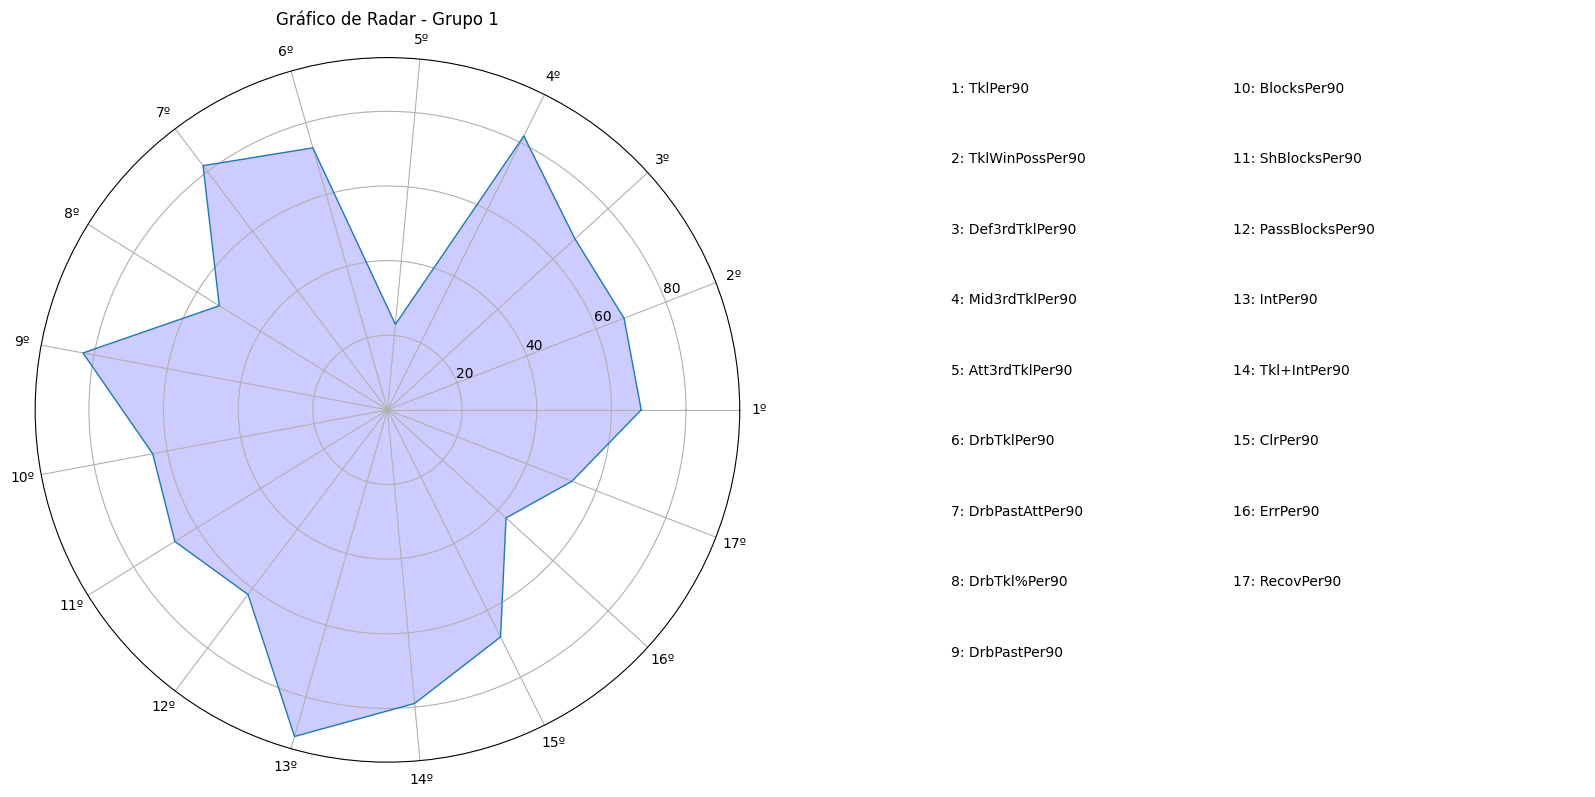

In [18]:
# Ejemplo de uso
# Suponiendo que 'enzoperez_grupo_1' y 'grupo_1' están definidos previamente
crear_radar_modificado(enzoperez_grupo_1, grupo_1, 'Grupo 1')

In [15]:
xFernandez_grupo_1 = df_grupo_1[df_grupo_1['Nombre'] == 'Ignacio Fernández']
xFernandez_grupo_2 = df_grupo_2[df_grupo_2['Nombre'] == 'Ignacio Fernández']

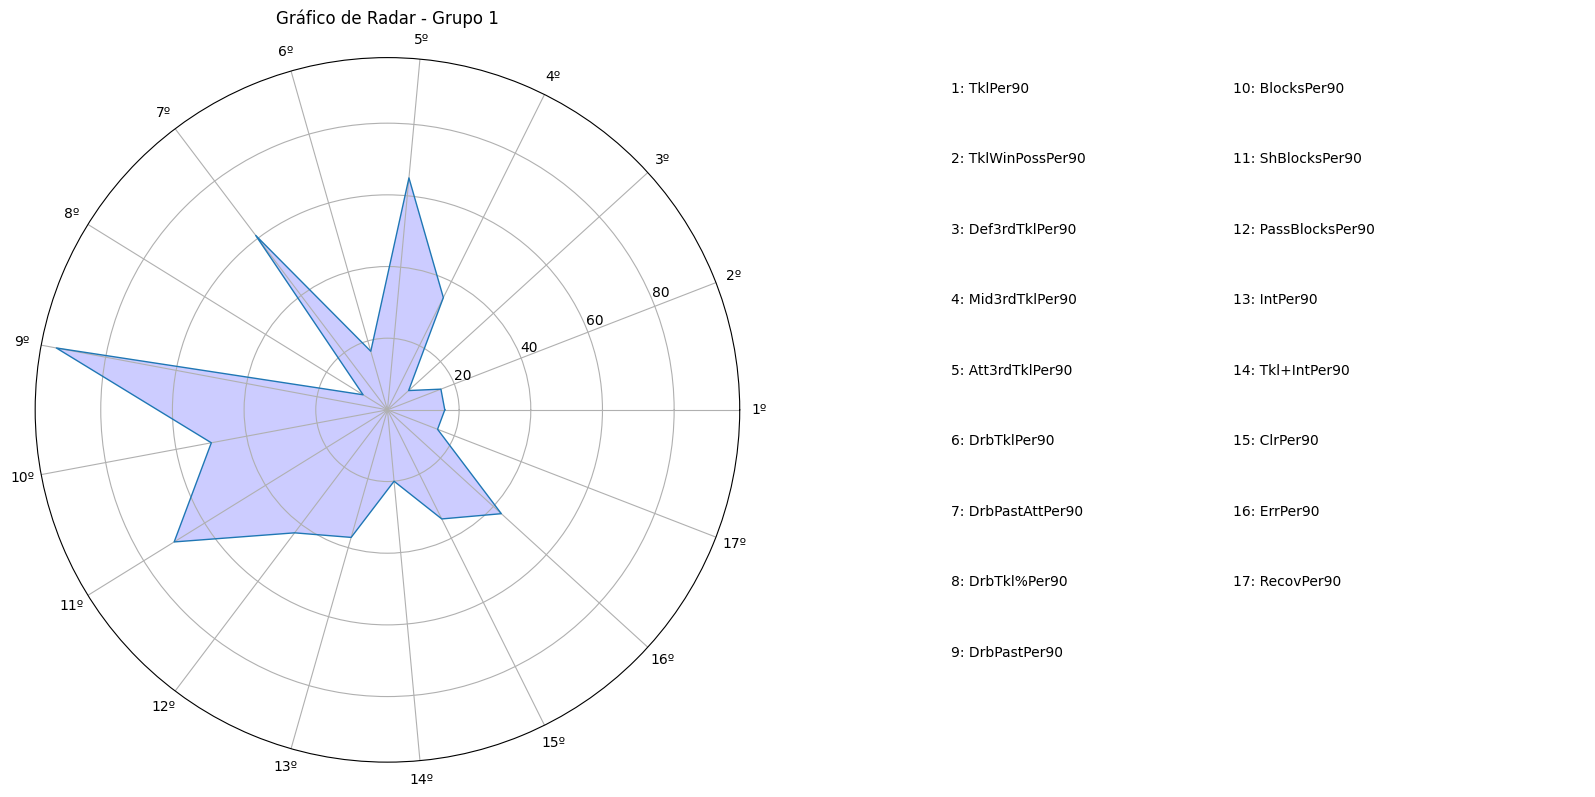

In [19]:
crear_radar_modificado(xFernandez_grupo_1, grupo_1, 'Grupo 1')